In [11]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import CenterCrop
import os
from einops import rearrange
import warnings

warnings.filterwarnings("ignore")

In [13]:
torch_obj = torch.load('dataset/5x_plexus_kfold_v8/0_S00-1910.pt')

img_samples = torch_obj['imgs'] 
plexus_samples = torch_obj['plexus_map']
ganglia_certain_samples = torch_obj['ganglia_certain_map']

In [14]:
img_samples.shape

torch.Size([3, 224, 224])

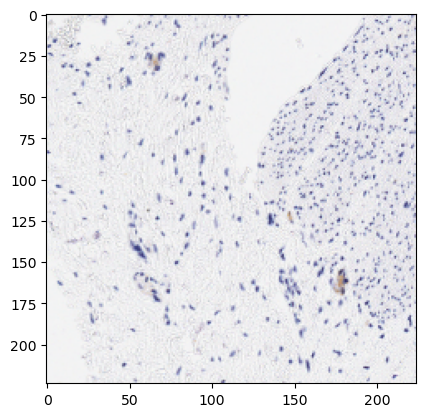

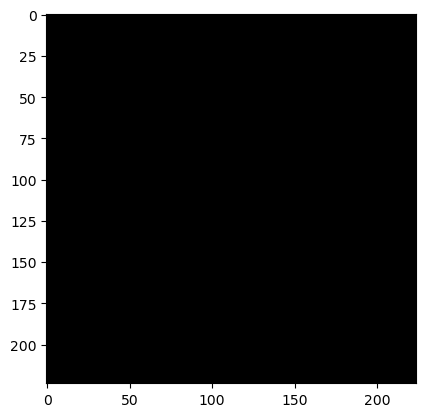

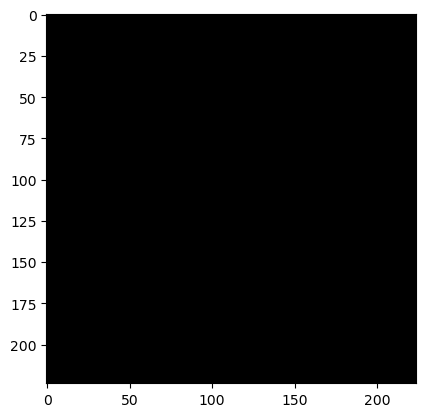

In [15]:
plt.imshow(rearrange(img_samples, 'c h w -> h w c'))
plt.show()

plt.imshow(rearrange(plexus_samples, 'c h w -> h w c'), cmap='gray')
plt.show()

plt.imshow(rearrange(ganglia_certain_samples, 'c h w -> h w c'), cmap='gray')
plt.show()

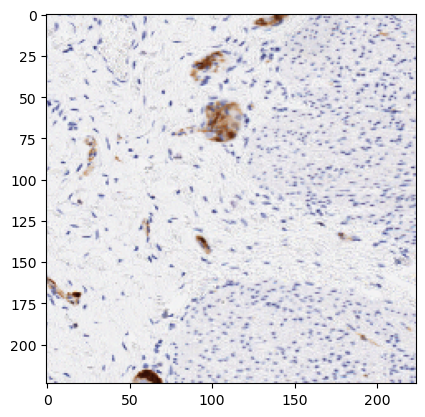

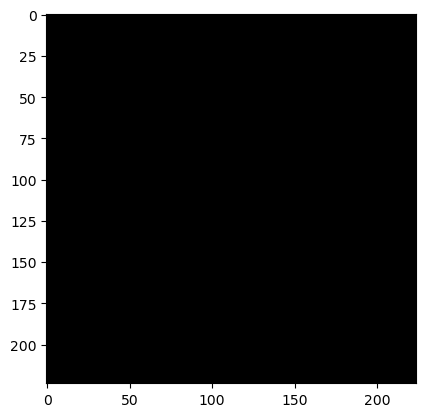

In [25]:
img = CenterCrop((224, 224))(img_samples)
plexus = CenterCrop((224, 224))(plexus_samples)



plt.imshow(rearrange(img, 'c h w -> h w c'))
plt.show()

plt.imshow(rearrange(plexus, 'c h w -> h w c'), cmap='gray')
plt.show()

In [19]:
df = pd.DataFrame(columns=["tile_location", "label"])

tile_paths = os.listdir('dataset/5x_plexus_kfold_v8')

for i_path, tile_path in enumerate(tile_paths):
    torch_obj = torch.load(os.path.join('dataset/5x_plexus_kfold_v8', tile_path))
    plexus = torch_obj['plexus_map']
    df.at[i_path, "tile_location"] = os.path.join('dataset/5x_plexus_kfold_v8', tile_path)
    df.at[i_path, "label"] = 1 if torch.any(plexus) else 0

df.to_csv("dataset/labeled_tiles_v7.csv")
df

,tile_location,label
0,dataset/5x_plexus_kfold_v8\0_S00-1910.pt,0
1,dataset/5x_plexus_kfold_v8\10000_S14-580.pt,1
2,dataset/5x_plexus_kfold_v8\10001_S14-580.pt,1
3,dataset/5x_plexus_kfold_v8\10002_S14-580.pt,0
4,dataset/5x_plexus_kfold_v8\10003_S14-580.pt,0
...,...,...
14995,dataset/5x_plexus_kfold_v8\9998_S14-3414.pt,1
14996,dataset/5x_plexus_kfold_v8\9999_S14-3414.pt,1
14997,dataset/5x_plexus_kfold_v8\999_S01-18.pt,1
14998,dataset/5x_plexus_kfold_v8\99_S00-1910.pt,1


In [20]:
df["tile_location"] = df["tile_location"].str.replace(r"\\", "/", regex=True)
df

,tile_location,label
0,dataset/5x_plexus_kfold_v8/0_S00-1910.pt,0
1,dataset/5x_plexus_kfold_v8/10000_S14-580.pt,1
2,dataset/5x_plexus_kfold_v8/10001_S14-580.pt,1
3,dataset/5x_plexus_kfold_v8/10002_S14-580.pt,0
4,dataset/5x_plexus_kfold_v8/10003_S14-580.pt,0
...,...,...
14995,dataset/5x_plexus_kfold_v8/9998_S14-3414.pt,1
14996,dataset/5x_plexus_kfold_v8/9999_S14-3414.pt,1
14997,dataset/5x_plexus_kfold_v8/999_S01-18.pt,1
14998,dataset/5x_plexus_kfold_v8/99_S00-1910.pt,1


In [21]:
df.to_csv("dataset/labeled_tiles_v7.csv")
df

,tile_location,label
0,dataset/5x_plexus_kfold_v8/0_S00-1910.pt,0
1,dataset/5x_plexus_kfold_v8/10000_S14-580.pt,1
2,dataset/5x_plexus_kfold_v8/10001_S14-580.pt,1
3,dataset/5x_plexus_kfold_v8/10002_S14-580.pt,0
4,dataset/5x_plexus_kfold_v8/10003_S14-580.pt,0
...,...,...
14995,dataset/5x_plexus_kfold_v8/9998_S14-3414.pt,1
14996,dataset/5x_plexus_kfold_v8/9999_S14-3414.pt,1
14997,dataset/5x_plexus_kfold_v8/999_S01-18.pt,1
14998,dataset/5x_plexus_kfold_v8/99_S00-1910.pt,1


In [22]:
df["label"].value_counts()

label
0    7500
1    7500
Name: count, dtype: int64

In [23]:
df['WSI'] = df['tile_location'].str.extract(r'_(S\d+-\d+)\.pt$')

wsi_label_counts = df[df['label'] == 1].groupby('WSI')['label'].count()
wsi_label_counts

WSI
S00-1910    250
S01-18      250
S02-410     250
S02-484     250
S03-2391    250
S04-1840    250
S04-52      250
S04-910     250
S07-1465    250
S07-1808    250
S08-2215    250
S09-2723    250
S09-2909    250
S11-1760    250
S14-1715    250
S14-2038    250
S14-3414    250
S14-580     250
S15-1442    250
S15-1518    250
S16-1415    250
S16-1467    250
S16-567     250
S97-2054    250
Name: label, dtype: int64

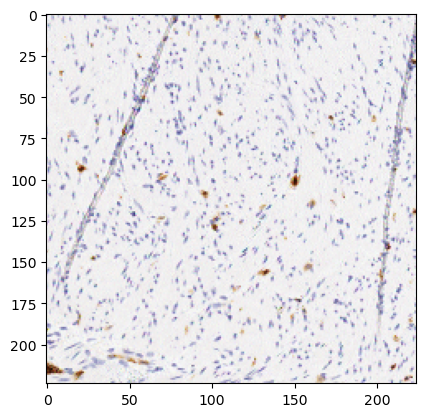

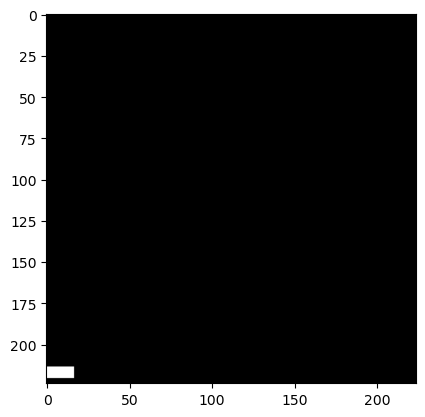

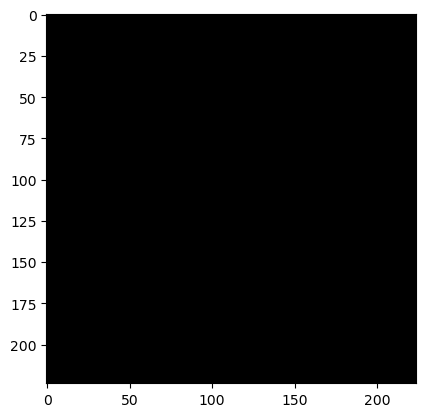

In [29]:
torch_obj = torch.load(df['tile_location'][500])

img_samples = torch_obj['imgs'] 
plexus_samples = torch_obj['plexus_map']
ganglia_certain_samples = torch_obj['ganglia_certain_map']


plt.imshow(rearrange(img_samples, 'c h w -> h w c'))
plt.show()

plt.imshow(rearrange(plexus_samples, 'c h w -> h w c'), cmap='gray')
plt.show()

plt.imshow(rearrange(ganglia_certain_samples, 'c h w -> h w c'), cmap='gray')
plt.show()

In [33]:
import torch
import h5py
import numpy as np
import pandas as pd

df = pd.read_csv("dataset/labeled_tiles_v7.csv")


for num in range(len(df)):
    pt_file = df['tile_location'][num]
    data = torch.load(pt_file)
    
    h5_file = f"dataset/5x_plexus_kfold_v8_hd5_final/{pt_file.split("/")[-1].split(".")[0]}.h5"
    df.at[num, "tile_location_hd5"] = h5_file
    
    with h5py.File(h5_file, "w") as f:
        for key, value in data.items():
            if isinstance(value, torch.Tensor):
                value = value.numpy()
            
            f.create_dataset(key, data=value, compression="gzip")
    
        f.attrs["patch_size"] = 224
        f.attrs["patch_level"] = 0
    
print(f"Converted {pt_file} -> {h5_file}")

Converted dataset/5x_plexus_kfold_v8/9_S00-1910.pt -> dataset/5x_plexus_kfold_v8_hd5_final/9_S00-1910.h5


In [34]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.to_csv("dataset/labeled_tiles_v7_with_hd5_final.csv")
df.head()

,tile_location,label,tile_location_hd5
0,dataset/5x_plexus_kfold_v8/0_S00-1910.pt,0,dataset/5x_plexus_kfold_v8_hd5_final/0_S00-191...
1,dataset/5x_plexus_kfold_v8/10000_S14-580.pt,1,dataset/5x_plexus_kfold_v8_hd5_final/10000_S14...
2,dataset/5x_plexus_kfold_v8/10001_S14-580.pt,1,dataset/5x_plexus_kfold_v8_hd5_final/10001_S14...
3,dataset/5x_plexus_kfold_v8/10002_S14-580.pt,0,dataset/5x_plexus_kfold_v8_hd5_final/10002_S14...
4,dataset/5x_plexus_kfold_v8/10003_S14-580.pt,0,dataset/5x_plexus_kfold_v8_hd5_final/10003_S14...


In [35]:
with h5py.File(df["tile_location_hd5"][0], "r") as f:
    for key, value in f.attrs.items():
        print(f"{key}: {value}")


patch_level: 0
patch_size: 224


In [36]:
with h5py.File(h5_file, "r") as f:
    print(list(f.keys()))

['ganglia_certain_map', 'ganglia_potential_map', 'imgs', 'muscle', 'plexus_map']


In [37]:
import h5py

h5_file = df["tile_location_hd5"][0]

with h5py.File(h5_file, "r") as f:
    print("Datasets in HDF5 file:", list(f.keys()))

    key = "plexus_map" 
    print(f"{key} shape:", f[key].shape)


Datasets in HDF5 file: ['ganglia_certain_map', 'ganglia_potential_map', 'imgs', 'muscle', 'plexus_map']
plexus_map shape: (1, 224, 224)


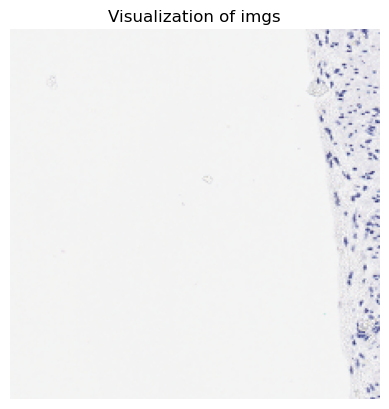

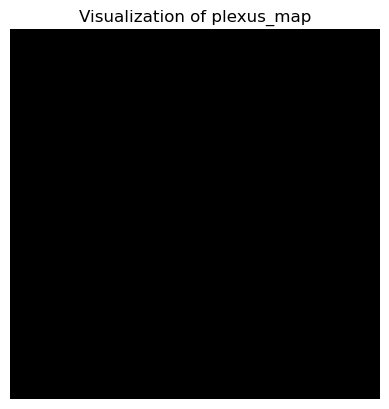

In [38]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

h5_file = df["tile_location_hd5"][1000]
key = "imgs"
key1 = "plexus_map"

with h5py.File(h5_file, "r") as f:
    data = f[key][:]
    data = np.transpose(data, (1, 2, 0))

    data1 = f[key1][:]
    data1 = np.transpose(data1, (1, 2, 0))

    plt.imshow(data, cmap='gray')
    plt.axis("off")
    plt.title(f"Visualization of {key}")
    plt.show()
    
    plt.imshow(data1, cmap='gray')
    plt.axis("off")
    plt.title(f"Visualization of {key1}")
    plt.show()
